In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_excel('Dataset_Cleaned.xlsx')

In [3]:
data

,Monte Carlo Runs,Leff,Vth,Tox,Vdd,Power dissipation (W),Delay (s),Delay (ns),Power Dissipation(uW),Tox(nm),Leff(nm)
0,1,2.758200e-09,0.54059,1.514800e-09,0.75903,0.000018,1.917000e-09,1.917,18.08138,1.5148,2.7582
1,2,2.389600e-09,0.47624,1.590100e-09,0.76943,0.000018,1.475000e-09,1.475,17.88775,1.5901,2.3896
2,3,2.976300e-09,0.38132,1.540800e-09,0.83163,0.000023,1.181000e-09,1.181,22.71555,1.5408,2.9763
3,4,2.404200e-09,0.52081,1.577200e-09,0.84360,0.000022,1.506000e-09,1.506,22.24472,1.5772,2.4042
4,5,3.550900e-09,0.44354,1.629300e-09,0.74524,0.000012,2.541000e-09,2.541,11.58125,1.6293,3.5509
...,...,...,...,...,...,...,...,...,...,...,...
948,949,3.206400e-09,0.49122,1.724100e-09,0.88610,0.000028,9.860000e-10,0.986,27.98314,1.7241,3.2064
949,950,2.789400e-09,0.53629,1.499200e-09,0.92526,0.000031,1.307000e-09,1.307,30.92826,1.4992,2.7894
950,951,2.609000e-09,0.53583,1.594400e-09,1.23340,0.000107,2.200000e-11,0.022,107.42120,1.5944,2.6090
951,952,2.327200e-09,0.37867,1.621400e-09,1.00740,0.000039,2.579000e-09,2.579,39.05847,1.6214,2.3272


In [4]:
data.drop(['Leff','Tox','Power dissipation (W)','Delay (s)'],axis=1)

,Monte Carlo Runs,Vth,Vdd,Delay (ns),Power Dissipation(uW),Tox(nm),Leff(nm)
0,1,0.54059,0.75903,1.917,18.08138,1.5148,2.7582
1,2,0.47624,0.76943,1.475,17.88775,1.5901,2.3896
2,3,0.38132,0.83163,1.181,22.71555,1.5408,2.9763
3,4,0.52081,0.84360,1.506,22.24472,1.5772,2.4042
4,5,0.44354,0.74524,2.541,11.58125,1.6293,3.5509
...,...,...,...,...,...,...,...
948,949,0.49122,0.88610,0.986,27.98314,1.7241,3.2064
949,950,0.53629,0.92526,1.307,30.92826,1.4992,2.7894
950,951,0.53583,1.23340,0.022,107.42120,1.5944,2.6090
951,952,0.37867,1.00740,2.579,39.05847,1.6214,2.3272


In [5]:
predictors=data[['Vth','Tox(nm)','Leff(nm)','Vdd']]

In [6]:
predictors

,Vth,Tox(nm),Leff(nm),Vdd
0,0.54059,1.5148,2.7582,0.75903
1,0.47624,1.5901,2.3896,0.76943
2,0.38132,1.5408,2.9763,0.83163
3,0.52081,1.5772,2.4042,0.84360
4,0.44354,1.6293,3.5509,0.74524
...,...,...,...,...
948,0.49122,1.7241,3.2064,0.88610
949,0.53629,1.4992,2.7894,0.92526
950,0.53583,1.5944,2.6090,1.23340
951,0.37867,1.6214,2.3272,1.00740


In [7]:
targets=data[['Power Dissipation(uW)','Delay (ns)']]

In [8]:
targets

,Power Dissipation(uW),Delay (ns)
0,18.08138,1.917
1,17.88775,1.475
2,22.71555,1.181
3,22.24472,1.506
4,11.58125,2.541
...,...,...
948,27.98314,0.986
949,30.92826,1.307
950,107.42120,0.022
951,39.05847,2.579


In [9]:
X_train, X_test, y_train, y_test = train_test_split(predictors,targets ,test_size=0.33, random_state=42)

In [10]:
model = LinearRegression()

In [11]:
ymodel=model.fit(X_train, y_train)

In [12]:
y_pred=model.predict(X_test)
print(y_pred)

[[35.96554668  1.1672652 ]
 [32.77013743  1.29699926]
 [24.37711278  1.64306159]
 [37.49159595  1.11947143]
 [28.29080007  1.48596497]
 [49.0319068   0.6240579 ]
 [30.53531492  1.36891042]
 [28.430941    1.47919092]
 [32.29649068  1.31525994]
 [10.64046453  2.23953661]
 [32.77480999  1.30268803]
 [45.66018449  0.75675703]
 [25.00193978  1.63665812]
 [16.28746538  1.98419691]
 [34.54561049  1.22848588]
 [33.07806649  1.27470525]
 [34.14399121  1.22474509]
 [43.11603853  0.87837494]
 [27.12700707  1.54907485]
 [32.19248685  1.32334528]
 [27.56880592  1.52266841]
 [31.28827851  1.37069336]
 [29.16592791  1.48724438]
 [-1.90585746  2.74777217]
 [21.30308021  1.77869399]
 [26.84260478  1.56611787]
 [24.97938764  1.61303474]
 [30.33837551  1.38269088]
 [39.18491017  1.03195157]
 [28.66114986  1.47492767]
 [19.32084642  1.85081368]
 [27.11814601  1.54315722]
 [11.10064349  2.19613678]
 [19.84095064  1.82915938]
 [33.11506566  1.28223078]
 [21.78333987  1.74312923]
 [16.52296305  1.98470898]
 

In [13]:
model.predict([[0.54059,1.5148,2.7582,0.75903]])

C:\Users\chriztoper\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.28125137,  2.12582513]])

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4222746704007515

Text(0.5, 1.0, 'Actual vs Predicted')

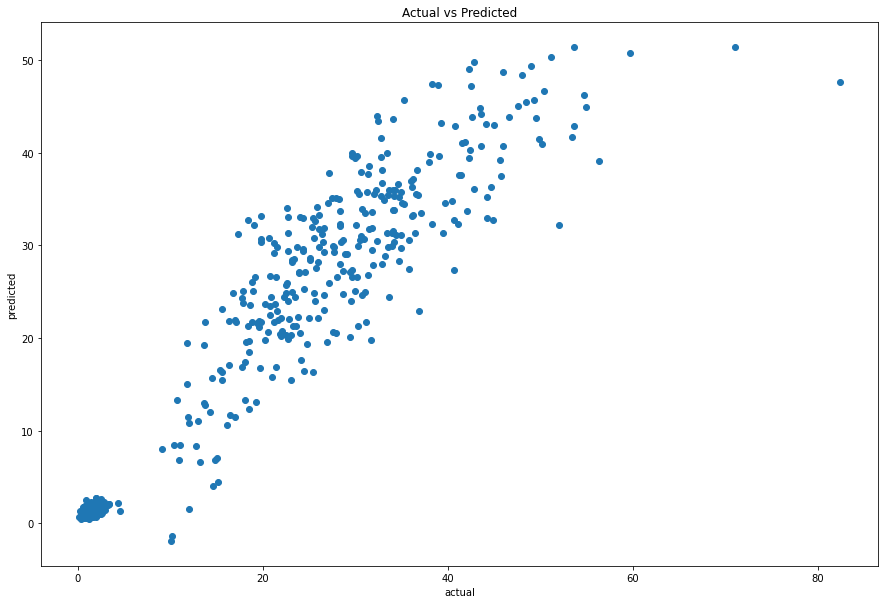

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')

In [39]:
predict_y=pd.DataFrame({'Actual value':[y_test],'Predicted value':[y_pred],'Difference' :[y_test-y_pred]})
predict_y[0:20]

,Actual value,Predicted value,Difference
0,Power Dissipation(uW) Delay (ns) 199 ...,"[[35.96554667617285, 1.1672652048127699], [32....",Power Dissipation(uW) Delay (ns) 199 ...


In [36]:
predict_y.to_excel("Predicted_Linear_Regression.xlsx",sheet_name='Sheet_name_1')